# Question 2

Build One-to-Many RNN full gradient from scratch

## Task
- `One-to-Many`를 직접 구현할 수 있다

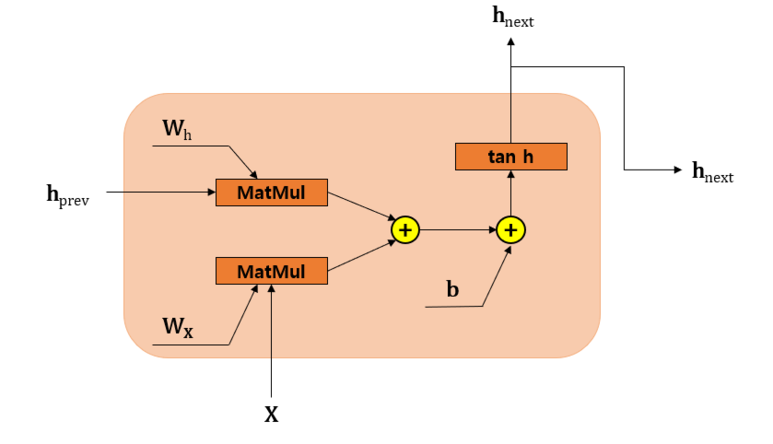

# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
from tqdm.auto import trange
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

# Define Data

In [2]:
idx2char = [ _ for _ in 'keras']
print(len(idx2char))
idx2char

5


['k', 'e', 'r', 'a', 's']

In [3]:
x_data = [[0]] # k
y_data = [[1,2,3,4]]  # eras

In [4]:
input = tf.keras.utils.to_categorical(x_data, num_classes=len(idx2char))
print(input.shape)
input

(1, 5)


array([[1., 0., 0., 0., 0.]], dtype=float32)

In [5]:
output = tf.keras.utils.to_categorical(y_data, num_classes=len(idx2char))
output = np.squeeze(output)
print(output.shape)
output

(4, 5)


array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

# Define Function

#### Sigmoid activation

In [6]:
def sigmoid(x):
    x_safe = x + 1e-12
    f = 1 / (1 + np.exp(-x_safe))
    return f

# Get dimension info

In [7]:
N = np.size(input,0) # number of samples
Ni = np.size(input,1) # dimension of the samples of input
No = np.size(output,1) # dimension of the sample of output
Nh = 20 # number of hidden units

print('number of samples :', N)
print('dimension of the samples of input :', Ni)
print('dimension of the sample of outputs :', No)
print('number of hidden units :', Nh)

number of samples : 1
dimension of the samples of input : 5
dimension of the sample of outputs : 5
number of hidden units : 20


( 0 epoch ) 	 | loss :  2.164511048983226
( 100 epoch ) 	 | loss :  1.803131428612559
( 200 epoch ) 	 | loss :  1.7578499168958281
( 300 epoch ) 	 | loss :  1.7460782005837825
( 400 epoch ) 	 | loss :  1.7409949150463904
( 500 epoch ) 	 | loss :  1.7380083446036765
( 600 epoch ) 	 | loss :  1.736035000782737
( 700 epoch ) 	 | loss :  1.7347925492512042
( 800 epoch ) 	 | loss :  1.7340097608026164
( 900 epoch ) 	 | loss :  1.7330939885453132
( 1000 epoch ) 	 | loss :  1.7311031869848095
( 1100 epoch ) 	 | loss :  1.7245744151446687
( 1200 epoch ) 	 | loss :  1.6758610190480108
( 1300 epoch ) 	 | loss :  1.5849589468498881
( 1400 epoch ) 	 | loss :  1.5029399625158775
( 1500 epoch ) 	 | loss :  1.442582359578507
( 1600 epoch ) 	 | loss :  1.4202586847506904
( 1700 epoch ) 	 | loss :  1.3841863074140066
( 1800 epoch ) 	 | loss :  1.3547709056141573
( 1900 epoch ) 	 | loss :  1.3297148961565146
( 2000 epoch ) 	 | loss :  1.307461492100785
( 2100 epoch ) 	 | loss :  1.2870310747390972
( 220

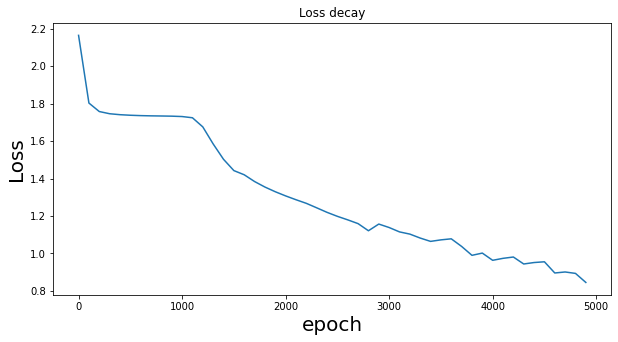

In [11]:
# learning rate
lr_rate = 0.01

# Xavier initialization
U = 2/np.sqrt(Nh)*(np.random.rand(Nh,Ni) - 0.5) # x->h
V = 2/np.sqrt(Nh)*(np.random.rand(Nh,Nh) - 0.5) # prev_h->next_h
W = 2/np.sqrt(Nh)*(np.random.rand(No,Nh) - 0.5) # h->o

# init epoch, history
t_ = []
loss_ = []
    
## TRAIN
hidden = np.zeros(Ni)

for epoch in trange(0,5000):
    loss = 0
    prev_output = None
    
    for id_ in range(0,len(output)):
        # Forward
        dU = 0*U
        dW = 0*W
        dV = 0*V
        
        if id_ == 0:
            x = input[0]
            hidden = np.dot(U, x)
            prev_hidden = hidden
        else:
            hidden = np.dot(V, prev_hidden)
            prev_hidden = hidden

        y_ = np.dot(W, sigmoid(hidden))
        y = sigmoid(y_)
        d = output[id_]
            
        for j in range(0,Nh):
            for i in range(0,No):
                dW[i,j] = dW[i,j] + sigmoid(hidden[j])*y[i]*(1-y[i])*(y[i]-d[i])
                
        W = W - lr_rate*dW
        
        for k in range(0,Ni):
            for j in range(0,Nh):
                for i in range(0,No):
                    dU[j,k] = dU[j,k] + x[k]*W[i,j]*sigmoid(hidden[j])*(1-sigmoid(hidden[j]))*y[i]*(1-y[i])*(y[i]-d[i]) 
        
        U = U - lr_rate*dU

        if id_ != 0:
            for k in range(0,Nh):
                for j in range(0,Nh):
                    for i in range(0,No):
                        V[j,k] = V[j,k] + prev_hidden[j]*W[i,j]*sigmoid(hidden[j])*(1-sigmoid(hidden[j]))*y[i]*(1-y[i])*(y[i]-d[i]) 

        V = V - lr_rate*dV
                
        loss = loss + 1/2*np.linalg.norm(y-d)
        
    if np.mod(epoch,100) == 0:
        print("(", epoch,"epoch ) \t", "| loss : ", loss)
        t_ = np.append(t_,epoch)
            
        loss_ = np.append(loss_,loss)
        
print('====================================================================')
plt.figure(num=0,figsize=[10,5])
plt.plot(t_,loss_,marker="")
plt.title('Loss decay')
plt.xlabel('epoch',FontSize=20)
plt.ylabel('Loss',FontSize=20)
plt.show()

In [16]:
input

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [30]:
## TEST
for id_ in range(0,len(output)):
    pred = [0,0,0,0,0]

    if id_ == 0:
        x = input[0]
        print("INPUT : ", x, '/', idx2char[np.argmax(x)], '\n')
        hidden = np.dot(U, x)
        prev_hidden = hidden

    else:
        hidden = np.dot(V, prev_hidden)
        prev_hidden = hidden
        
    y_ = np.dot(W,sigmoid(hidden))
    y = sigmoid(y_)
    
    pred[np.argmax(y)]=1
    
    print(f'OUTPUT {id_} : ')
    print(">>> Sigmoid", y)
    print(">>> Prediction", pred, "/", idx2char[np.argmax(y)])
    print('==============================================')

INPUT :  [1. 0. 0. 0. 0.] / k 

OUTPUT 0 : 
>>> Sigmoid [0.01386444 0.50674476 0.14793717 0.19723403 0.02439823]
>>> Prediction [0, 1, 0, 0, 0] / e
OUTPUT 1 : 
>>> Sigmoid [0.01958823 0.18214617 0.69933747 0.0313777  0.16802261]
>>> Prediction [0, 0, 1, 0, 0] / r
OUTPUT 2 : 
>>> Sigmoid [0.0086165  0.32120471 0.0772394  0.82805065 0.00128095]
>>> Prediction [0, 0, 0, 1, 0] / a
OUTPUT 3 : 
>>> Sigmoid [0.05759917 0.18322749 0.26366002 0.016256   0.8418667 ]
>>> Prediction [0, 0, 0, 0, 1] / s
